In [1]:
import  pandas  as  pd
import  numpy  as  np
import  matplotlib.pyplot  as  plt
import random

## Part C - Logistic Regression - Learning Task 1 - LR1


In [2]:
# for preprocessing dataset. note that it returns a copy of the dataset and doesn't modify the original dataset
def preprocess(df_orig, to_standardize=False):
    df = df_orig.copy()

    # fill na values with mean in each column
    for i, col in enumerate(df.columns[2:]):
        df[col] = df[col].fillna(df[col].mean())

    # standardize data wrt normal distribution, only if, to_standardize variable is set to True
    if to_standardize == True:
        for i, col in enumerate(df.columns[2:]):
            df[col] = (df[col] - df[col].mean())/df[col].std()

    # Setting Malignant as the positive class and Benign as the negative class
    df['diagnosis'] = df['diagnosis'].replace('B', 0)
    df['diagnosis'] = df['diagnosis'].replace('M', 1)

    return df

**Read the data**

In [3]:
np.set_printoptions(suppress=True)
df = pd.read_csv("dataset.csv")

df.dropna( inplace=True)
df = preprocess(df, False)
print(df.shape)

target = df.iloc[:, 1]
df = df.drop(['diagnosis','id'], axis=1)
df.head()

(563, 32)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
order=[]
for i in range(len(df)):
    order.append(i)


shuffle = random.sample(order, int(len(order) * 0.67))

rem = [i for i in order if i not in shuffle]

In [5]:
X_train = df.iloc[shuffle]
Y_train = target.iloc[shuffle]
X_test = df.iloc[rem]
Y_test = target.iloc[rem]

print(X_train.shape)
print(X_test.shape)

(377, 30)
(186, 30)


In [6]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    # final_result = 1/(1+np.exp(-result/1e5))
    return final_result

# this will give overflow
# sigmoid_activation(-800)


In [7]:
def compute_accuracy(X_test, Y_test, weights, bias, probability_threshold):
    accuracy = 0
    # weighted sum of inputs / weights
    weighted_sum = np.dot(X_test, weights) + bias
    # activate
    activated_output = sigmoid_activation(weighted_sum)
    # calculate accuracy
    predictions = np.where(activated_output >= probability_threshold, 1, 0)
    accuracy = (predictions == Y_test).mean()

    return accuracy

## Batch Gradient Descent

In [8]:
def batch_gd(X_train, y_train, learning_rate, num_iter,probability_threshold, plot_idx = 1):
    # initialize weights
    weights = np.zeros(X_train.shape[1])
    bias = 0
    max_accuracy = 0
    chkptw = 0
    chkptb = 0
    accuracy = 0
    activated_output = 0
    costs = []
    epsilon = 1e-5
    for i in range(num_iter):
        # weighted sum of inputs / weights
        weighted_sum = np.dot(X_train, weights) + bias
        # activate
        activated_output = sigmoid_activation(weighted_sum)
        # calculate error
        error = y_train - activated_output

        cost = -np.sum((y_train)*np.log(activated_output + epsilon) + (1-y_train)*np.log(1-activated_output + epsilon))
        costs.append(cost)

        # adjust weights
        weights += learning_rate * np.dot(X_train.T, error)
        # adjust bias
        bias += learning_rate * error.sum()
        # calculate accuracy
        predictions = np.where(activated_output >= probability_threshold, 1, 0)
        accuracy = (predictions == y_train).mean()
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            chkptw = weights
            chkptb = bias
    print()
    print("Probability Threshold:", probability_threshold)
    print("Training Data. Max accuracy: {:.5f}".format(max_accuracy))
    # print("Training Data. Accuracy: {:.5f}".format(accuracy))
    plt.subplot(1, 5, plot_idx)
    plt.plot(costs)
    # print("Activated Output", activated_output)
    return chkptw, chkptb

Learning Rate = 0.0001

C:\Users\pksah\AppData\Local\Temp\ipykernel_18316\753126747.py:2: RuntimeWarning: overflow encountered in exp
  final_result = 1/(1+np.exp(-result))



Probability Threshold: 0.3
Training Data. Max accuracy: 0.92308
Testing Data Accuracy:  0.44086021505376344

Probability Threshold: 0.4
Training Data. Max accuracy: 0.92308
Testing Data Accuracy:  0.44086021505376344

Probability Threshold: 0.5
Training Data. Max accuracy: 0.92308
Testing Data Accuracy:  0.44086021505376344

Probability Threshold: 0.6
Training Data. Max accuracy: 0.92308
Testing Data Accuracy:  0.44086021505376344

Probability Threshold: 0.7
Training Data. Max accuracy: 0.92308
Testing Data Accuracy:  0.44086021505376344


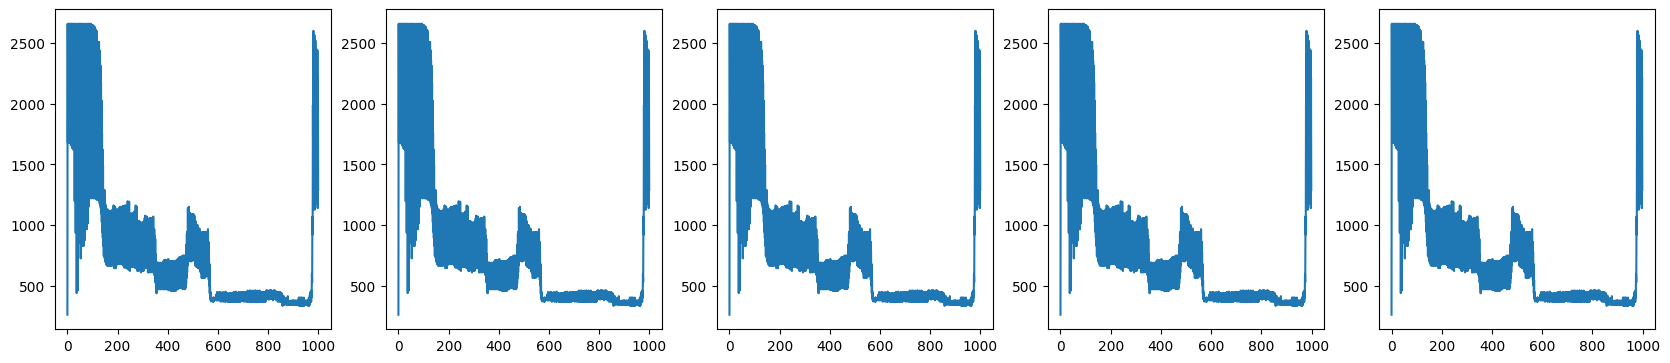

In [9]:
learning_rate = 0.0001
num_iter = 1000
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.3, plot_idx=1)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.3))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.4, plot_idx=2)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.4))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.5, plot_idx=3)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.5))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.6, plot_idx=4)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.6))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.7, plot_idx=5)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.7))
fig = plt.gcf()
fig.set_size_inches(20, 4)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

Learning Rate = 0.001

C:\Users\pksah\AppData\Local\Temp\ipykernel_18316\753126747.py:2: RuntimeWarning: overflow encountered in exp
  final_result = 1/(1+np.exp(-result))



Probability Threshold: 0.3
Training Data. Max accuracy: 0.92042
Testing Data Accuracy:  0.9032258064516129

Probability Threshold: 0.4
Training Data. Max accuracy: 0.92042
Testing Data Accuracy:  0.9032258064516129

Probability Threshold: 0.5
Training Data. Max accuracy: 0.92042
Testing Data Accuracy:  0.9032258064516129

Probability Threshold: 0.6
Training Data. Max accuracy: 0.92042
Testing Data Accuracy:  0.9032258064516129

Probability Threshold: 0.7
Training Data. Max accuracy: 0.92042
Testing Data Accuracy:  0.9032258064516129


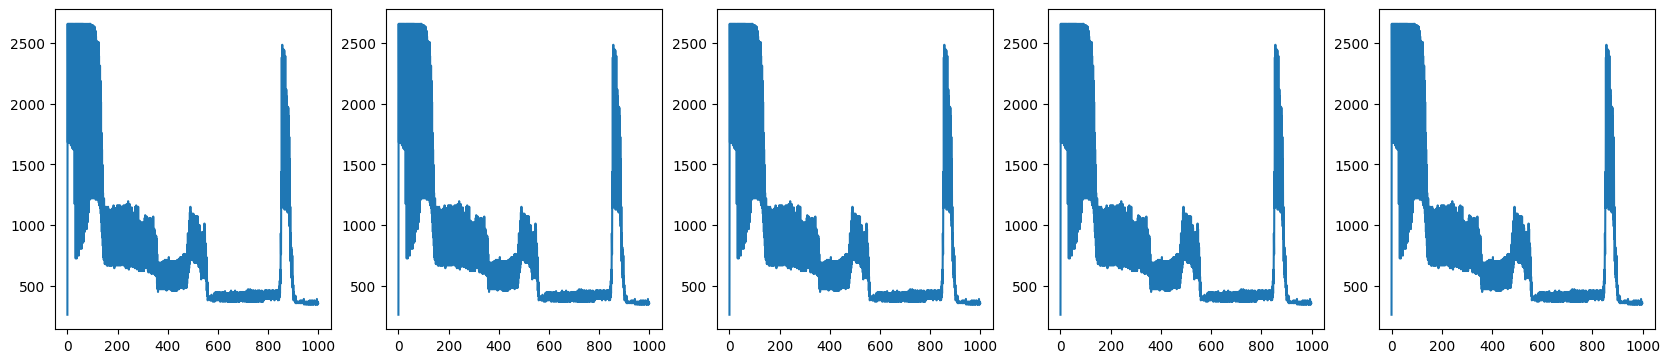

In [10]:
learning_rate = 0.001
num_iter = 1000
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.3, plot_idx=1)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.3))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.4, plot_idx=2)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.4))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.5, plot_idx=3)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.5))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.6, plot_idx=4)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.6))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.7, plot_idx=5)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.7))
fig = plt.gcf()
fig.set_size_inches(20, 4)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

Learning Rate = 0.01

C:\Users\pksah\AppData\Local\Temp\ipykernel_18316\753126747.py:2: RuntimeWarning: overflow encountered in exp
  final_result = 1/(1+np.exp(-result))



Probability Threshold: 0.3
Training Data. Max accuracy: 0.92042
Testing Data Accuracy:  0.9032258064516129

Probability Threshold: 0.4
Training Data. Max accuracy: 0.92042
Testing Data Accuracy:  0.9032258064516129

Probability Threshold: 0.5
Training Data. Max accuracy: 0.92042
Testing Data Accuracy:  0.9032258064516129

Probability Threshold: 0.6
Training Data. Max accuracy: 0.92042
Testing Data Accuracy:  0.9032258064516129

Probability Threshold: 0.7
Training Data. Max accuracy: 0.92042
Testing Data Accuracy:  0.9032258064516129


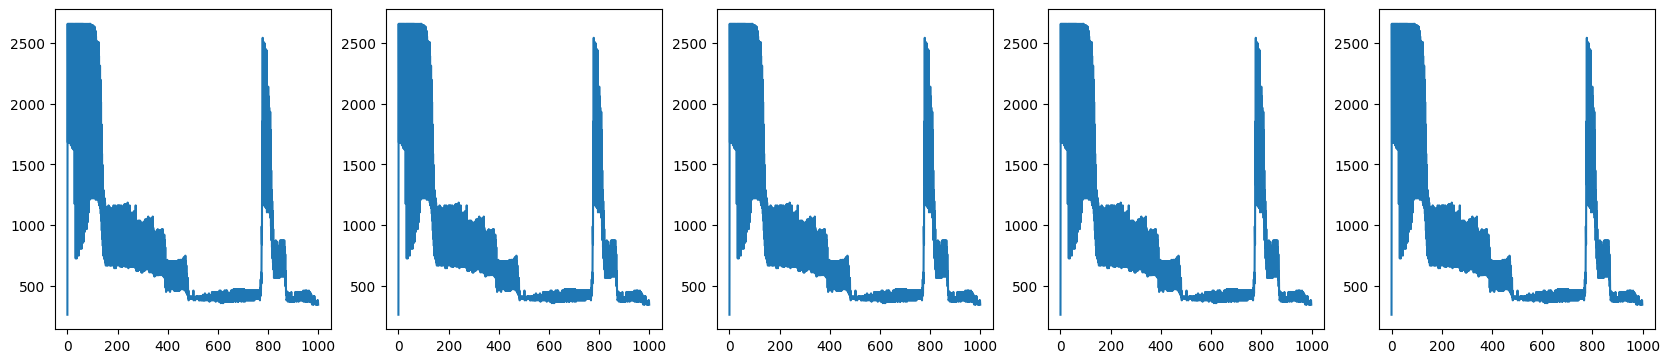

In [11]:
learning_rate = 0.01
num_iter = 1000
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.3, plot_idx=1)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.3))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.4, plot_idx=2)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.4))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.5, plot_idx=3)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.5))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.6, plot_idx=4)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.6))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.7, plot_idx=5)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.7))
fig = plt.gcf()
fig.set_size_inches(20, 4)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

## Mini Batch Gradient Descent

In [29]:
def mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold, plot_idx = 1):
    # initialize weights
    weights = np.zeros(X_train.shape[1])
    bias = 0
    max_accuracy = 0
    chkptw = 0
    chkptb = 0
    accuracy = 0
    activated_output = 0
    costs = []
    epsilon = 1e-5
    nrows = X_train.shape[0]
    choices = np.random.choice(nrows, replace=False, size = batch_size)
    x_train = X_train.iloc[choices]
    y_train = Y_train.iloc[choices]
    for i in range(int(num_iter)):
        # weighted sum of inputs / weights
        weighted_sum = np.dot(x_train, weights) + bias
        # activate
        activated_output = sigmoid_activation(weighted_sum)
        # calculate error
        error = y_train - activated_output

        cost = -np.sum(y_train*np.log(activated_output + epsilon) + (1-y_train)*np.log(1-activated_output + epsilon))
        costs.append(cost)

        # adjust weights
        weights += learning_rate * np.dot(x_train.T, error)
        # adjust bias
        bias += learning_rate * error.sum()
        # calculate accuracy
        predictions = np.where(activated_output >= probability_threshold, 1, 0)
        accuracy = (predictions == y_train).mean()
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            chkptw = weights
            chkptb = bias
        choices = np.random.choice(nrows, replace=False, size = batch_size)
        x_train = X_train.iloc[choices]
        y_train = Y_train.iloc[choices]

    print()
    print("Probability Threshold:", probability_threshold)
    # print("Training Data. Max accuracy: {:.5f}".format(max_accuracy))
    # print("Training Data. Accuracy: {:.5f}".format(accuracy))
    plt.subplot(1, 5, plot_idx)
    plt.plot(costs)
    return chkptw, chkptb

Learning Rate = 0.0001

C:\Users\pksah\AppData\Local\Temp\ipykernel_18316\753126747.py:2: RuntimeWarning: overflow encountered in exp
  final_result = 1/(1+np.exp(-result))



Probability Threshold: 0.3
Testing Data Accuracy:  0.8978494623655914

Probability Threshold: 0.4
Testing Data Accuracy:  0.8494623655913979

Probability Threshold: 0.5
Testing Data Accuracy:  0.9247311827956989

Probability Threshold: 0.6
Testing Data Accuracy:  0.9032258064516129

Probability Threshold: 0.7
Testing Data Accuracy:  0.9247311827956989


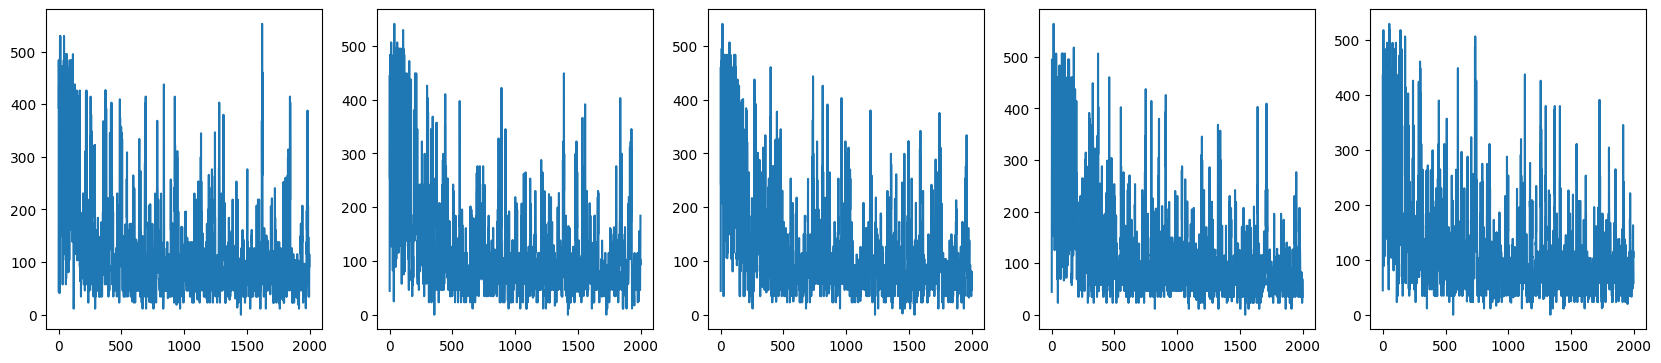

In [30]:
num_iter = 2000
learning_rate = 0.0001
batch_size = 64
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.3, plot_idx=1)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.3))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.4, plot_idx=2)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.4))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.5, plot_idx=3)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.5))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.6, plot_idx=4)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.6))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.7, plot_idx=5)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.7))
fig = plt.gcf()
fig.set_size_inches(20, 4)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)


Learning Rate = 0.001

C:\Users\pksah\AppData\Local\Temp\ipykernel_18316\753126747.py:2: RuntimeWarning: overflow encountered in exp
  final_result = 1/(1+np.exp(-result))



Probability Threshold: 0.3
Testing Data Accuracy:  0.8709677419354839

Probability Threshold: 0.4
Testing Data Accuracy:  0.8602150537634409

Probability Threshold: 0.5
Testing Data Accuracy:  0.9247311827956989

Probability Threshold: 0.6
Testing Data Accuracy:  0.9247311827956989

Probability Threshold: 0.7
Testing Data Accuracy:  0.8064516129032258


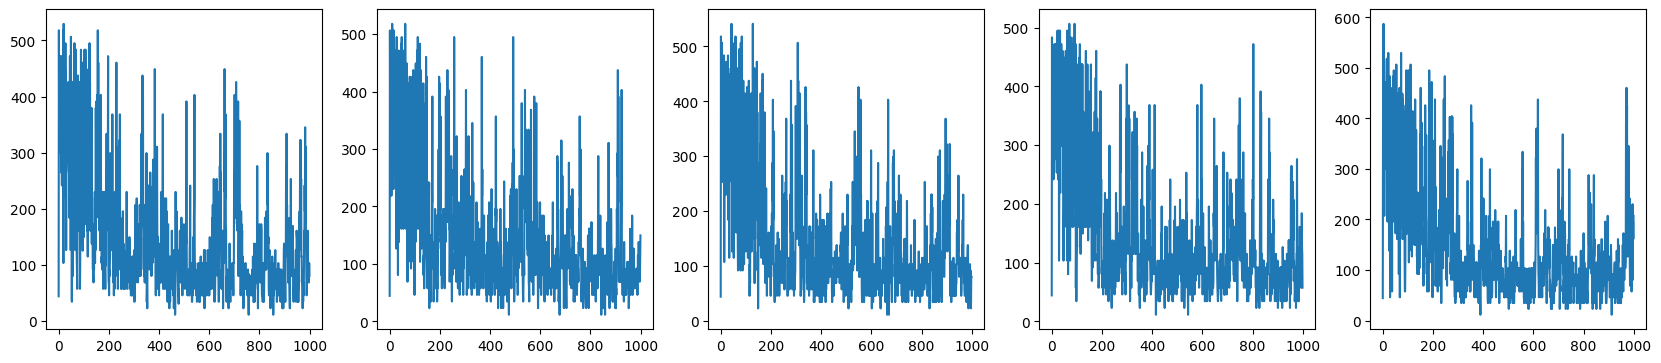

In [37]:
num_iter = 1000
learning_rate = 0.001
batch_size = 64
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.3, plot_idx=1)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.3))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.4, plot_idx=2)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.4))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.5, plot_idx=3)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.5))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.6, plot_idx=4)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.6))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.7, plot_idx=5)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.7))
fig = plt.gcf()
fig.set_size_inches(20, 4)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

Learning Rate = 0.01

C:\Users\pksah\AppData\Local\Temp\ipykernel_18316\753126747.py:2: RuntimeWarning: overflow encountered in exp
  final_result = 1/(1+np.exp(-result))



Probability Threshold: 0.3
Testing Data Accuracy:  0.9247311827956989

Probability Threshold: 0.4
Testing Data Accuracy:  0.9247311827956989

Probability Threshold: 0.5
Testing Data Accuracy:  0.9301075268817204

Probability Threshold: 0.6
Testing Data Accuracy:  0.9032258064516129

Probability Threshold: 0.7
Testing Data Accuracy:  0.6935483870967742


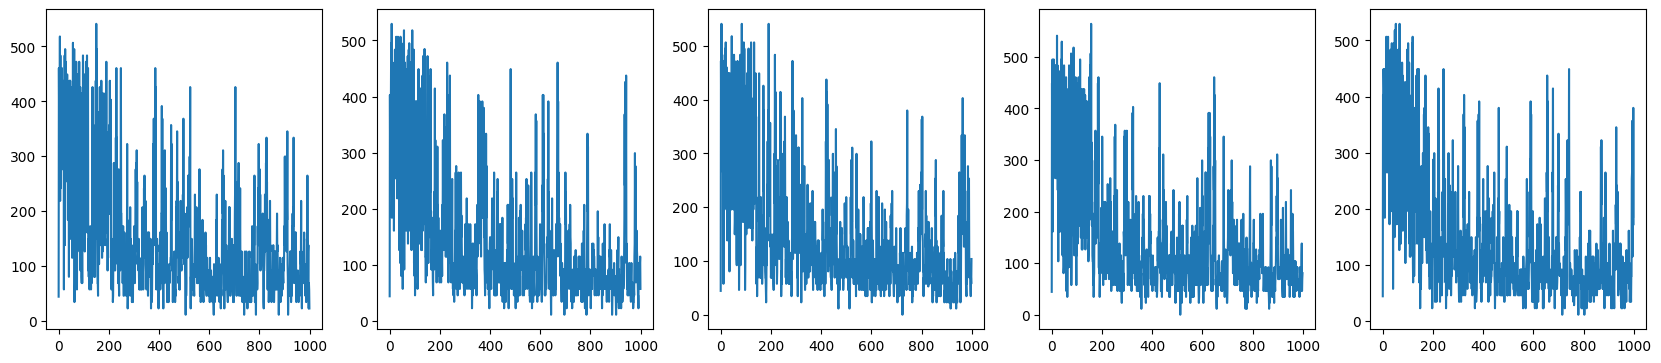

In [43]:
num_iter = 1000
learning_rate = 0.01
batch_size = 64
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.3, plot_idx=1)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.3))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.4, plot_idx=2)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.4))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.5, plot_idx=3)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.5))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.6, plot_idx=4)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.6))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.7, plot_idx=5)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.7))
fig = plt.gcf()
fig.set_size_inches(20, 4)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

## Stochastic Gradient Descent

In [44]:
def stochastic_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold, plot_idx = 1):
    batch_size = 1
    # initialize weights
    weights = np.zeros(X_train.shape[1])
    bias = 0
    max_accuracy = 0
    chkptw = 0
    chkptb = 0
    accuracy = 0
    activated_output = 0
    costs = []
    epsilon = 1e-5
    nrows = X_train.shape[0]
    choices = np.random.choice(nrows, replace=False, size = batch_size)
    x_train = X_train.iloc[choices]
    y_train = Y_train.iloc[choices]
    for i in range(int(num_iter)):
        # weighted sum of inputs / weights
        weighted_sum = np.dot(x_train, weights) + bias
        # activate
        activated_output = sigmoid_activation(weighted_sum)
        # calculate error
        error = y_train - activated_output

        cost = -np.sum(y_train*np.log(activated_output + epsilon) + (1-y_train)*np.log(1-activated_output + epsilon))
        costs.append(cost)

        # adjust weights
        weights += learning_rate * np.dot(x_train.T, error)
        # adjust bias
        bias += learning_rate * error.sum()
        # calculate accuracy
        predictions = np.where(activated_output >= probability_threshold, 1, 0)
        accuracy = (predictions == y_train).mean()
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            chkptw = weights
            chkptb = bias
        choices = np.random.choice(nrows, replace=False, size = batch_size)
        x_train = X_train.iloc[choices]
        y_train = Y_train.iloc[choices]
    print()
    print("Probability Threshold:", probability_threshold)
    # print("Training Data. Max accuracy: {:.5f}".format(max_accuracy))
    # print("Training Data. Accuracy: {:.5f}".format(accuracy))
    plt.subplot(1, 5, plot_idx)
    plt.plot(costs)
    return chkptw, chkptb


Learning Rate = 0.0001


Probability Threshold: 0.3
Testing Data Accuracy:  0.8978494623655914

Probability Threshold: 0.4
Testing Data Accuracy:  0.8333333333333334

Probability Threshold: 0.5
Testing Data Accuracy:  0.9354838709677419

Probability Threshold: 0.6
Testing Data Accuracy:  0.9247311827956989

Probability Threshold: 0.7
Testing Data Accuracy:  0.6989247311827957


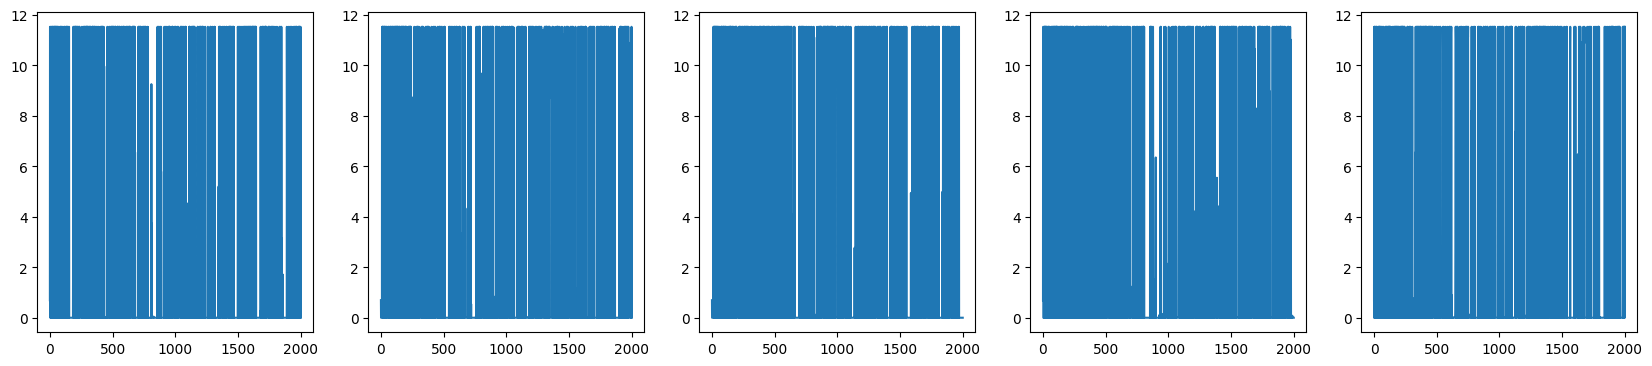

In [50]:
num_iterations = 2000
learning_rate = 0.0001
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.3, plot_idx=1)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.3))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.4, plot_idx=2)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.4))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.5, plot_idx=3)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.5))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.6, plot_idx=4)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.6))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.7, plot_idx=5)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.7))
fig = plt.gcf()
fig.set_size_inches(20, 4)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

Learning Rate = 0.001

C:\Users\pksah\AppData\Local\Temp\ipykernel_18316\753126747.py:2: RuntimeWarning: overflow encountered in exp
  final_result = 1/(1+np.exp(-result))



Probability Threshold: 0.3
Testing Data Accuracy:  0.9247311827956989

Probability Threshold: 0.4
Testing Data Accuracy:  0.9301075268817204

Probability Threshold: 0.5
Testing Data Accuracy:  0.9301075268817204

Probability Threshold: 0.6
Testing Data Accuracy:  0.6881720430107527

Probability Threshold: 0.7
Testing Data Accuracy:  0.9139784946236559


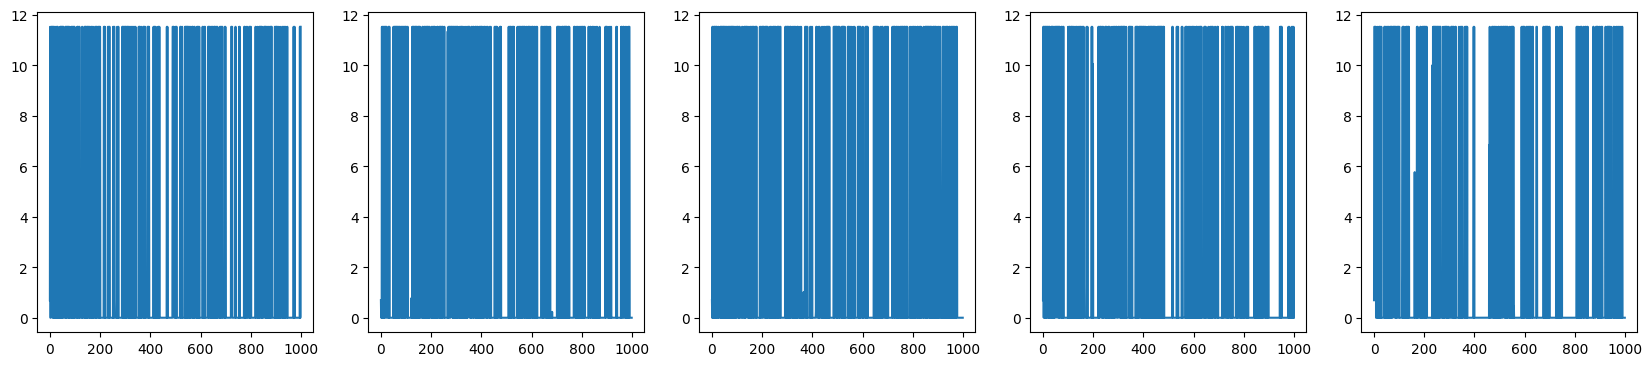

In [51]:
num_iterations = 1000
learning_rate = 0.001
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.3, plot_idx=1)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.3))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.4, plot_idx=2)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.4))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.5, plot_idx=3)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.5))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.6, plot_idx=4)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.6))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.7, plot_idx=5)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.7))
fig = plt.gcf()
fig.set_size_inches(20, 4)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

Learning Rate = 0.01

C:\Users\pksah\AppData\Local\Temp\ipykernel_18316\753126747.py:2: RuntimeWarning: overflow encountered in exp
  final_result = 1/(1+np.exp(-result))



Probability Threshold: 0.3
Testing Data Accuracy:  0.9193548387096774

Probability Threshold: 0.4
Testing Data Accuracy:  0.8440860215053764

Probability Threshold: 0.5
Testing Data Accuracy:  0.9139784946236559

Probability Threshold: 0.6
Testing Data Accuracy:  0.9247311827956989

Probability Threshold: 0.7
Testing Data Accuracy:  0.6827956989247311


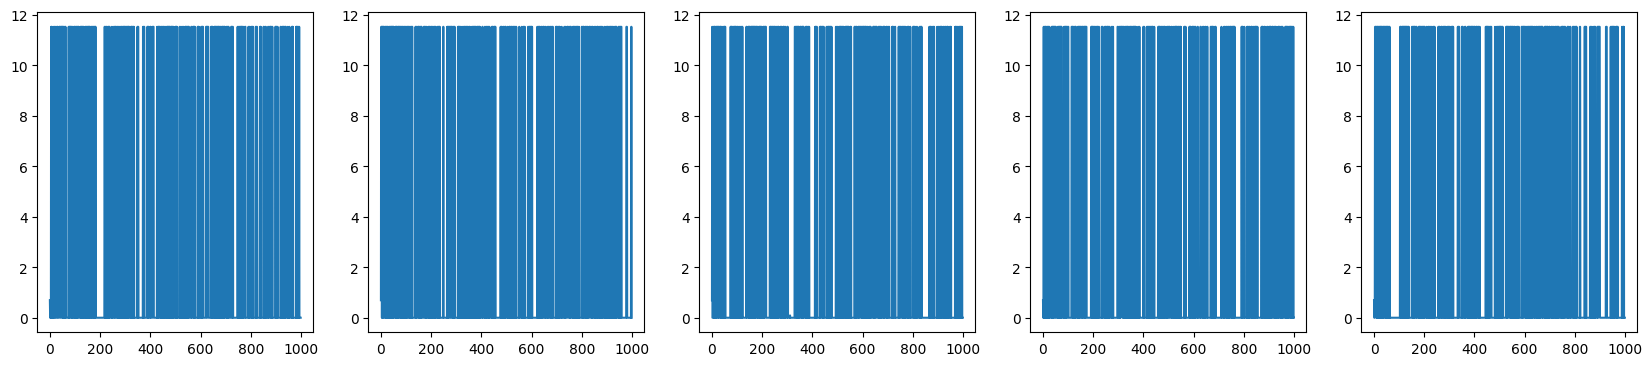

In [56]:
num_iterations = 1000
learning_rate = 0.01
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.3, plot_idx=1)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.3))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.4, plot_idx=2)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.4))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.5, plot_idx=3)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.5))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.6, plot_idx=4)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.6))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.7, plot_idx=5)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.7))
fig = plt.gcf()
fig.set_size_inches(20, 4)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)